In [1]:
import pandas as pd
import os
all_months_data=pd.DataFrame()
files=[file for file in os.listdir("A:\Data Analytics\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data")] #this came from copy path
for file in files:
    df=pd.read_csv("A:/Data Analytics/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/" +file)
    all_months_data=pd.concat([all_months_data,df])
all_months_data.to_csv("combined_data.csv", index=False)
all_data=pd.read_csv("A:\Data Analytics\Pandas-Data-Science-Tasks-master\SalesAnalysis\combined_data.csv")
all_data=all_data.dropna(how='all')
all_data=all_data[all_data['Order Date'].str[0:2]!='Or']
all_data['Month']=all_data['Order Date'].str[0:2]
all_data['Month']=all_data['Month'].astype('int32')
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype('int32')
all_data['Price Each']=pd.to_numeric(all_data['Price Each']) #Make float
all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']



### Q2:What city sold the most product?

#### Add a city column

In [2]:
all_data['Column']=all_data['Purchase Address'].apply(lambda x: x.split(',')[1])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Column
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [3]:
all_data.drop('Column', axis=1, inplace=True)
def get_city(adress):
    return adress.split(',')[1]
all_data['City']=all_data['Purchase Address'].apply(lambda x: get_city(x))
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [5]:
##But the problem is, 2 states can have the city with same name, need to resolve this. 
def get_city(adress):
    return adress.split(',')[1]
def get_state (adress):
    return adress.split(',')[2].split(' ')[1] 
all_data['City']=all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [7]:
results=all_data.groupby('City').sum()
results.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
City,,,,,,,,
Atlanta (GA),1765641765711765821765891766231766271766341766...,USB-C Charging CableLightning Charging CableBo...,16602,2779908.20,04/12/19 10:5804/19/19 14:2904/27/19 12:2004/0...,"790 Ridge St, Atlanta, GA 30301253 Johnson St,...",104794,2795498.58
Austin (TX),1765911766091766741766771766861767011767051767...,Apple Airpods HeadphonesApple Airpods Headphon...,11153,1809873.61,04/21/19 07:2104/11/19 16:5904/20/19 20:5304/0...,"600 Maple St, Austin, TX 73301267 11th St, Aus...",69829,1819581.75
Boston (MA),1765591765661765781765811765851765851766001766...,Bose SoundSport HeadphonesWired HeadphonesAppl...,22528,3637409.77,04/07/19 22:3004/08/19 14:0504/09/19 23:3504/0...,"682 Chestnut St, Boston, MA 0221583 7th St, Bo...",141112,3661642.01
Dallas (TX),1765581765691765701765771765961766021766101766...,USB-C Charging Cable27in 4K Gaming MonitorAA B...,16730,2752627.82,04/19/19 08:4604/16/19 19:2304/22/19 15:0904/0...,"917 1st St, Dallas, TX 75001657 Hill St, Dalla...",104620,2767975.40
Los Angeles (CA),1765601765601765611765671765741765741765761765...,Google PhoneWired HeadphonesWired HeadphonesGo...,33289,5421435.23,04/12/19 14:3804/12/19 14:3804/30/19 09:2704/1...,"669 Spruce St, Los Angeles, CA 90001669 Spruce...",208325,5452570.80


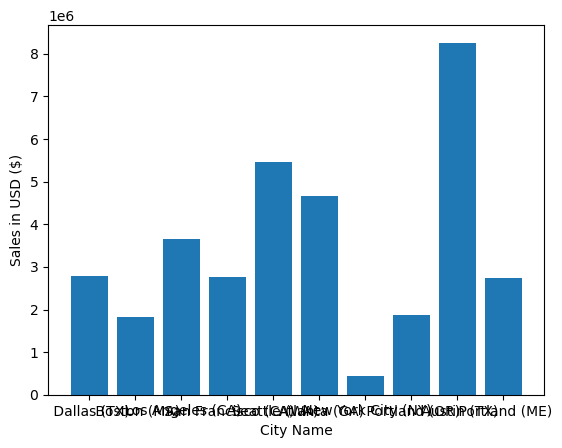

In [8]:
import matplotlib.pyplot as plt
cities = all_data['City'].unique()
plt.bar(cities, results['Sales'])
plt.xticks(cities)
plt.xlabel('City Name')
plt.ylabel('Sales in USD ($)')
plt.show()

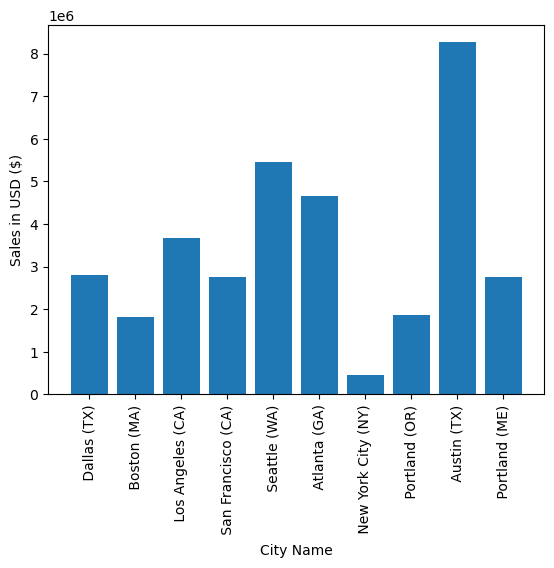

In [14]:
#seeing these collapse let's make names vertical 
import matplotlib.pyplot as plt
cities = all_data['City'].unique()
plt.bar(cities, results['Sales']) # bar should come first
plt.xticks(cities, rotation='vertical')
plt.xlabel('City Name')
plt.ylabel('Sales in USD ($)')
plt.show()

In [15]:
## Problem is Sanfrancisco was highest but, showing Austin as highest, 

In [16]:
## it's because of inconsistency made by quniue()

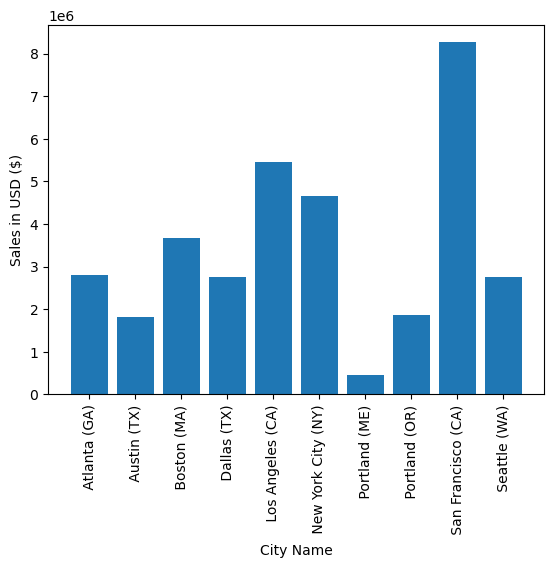

In [17]:
cities = [city for city, df in all_data.groupby('City')] #now it's in correct order
plt.bar(cities, results['Sales']) # bar should come first
plt.xticks(cities, rotation='vertical')
plt.xlabel('City Name')
plt.ylabel('Sales in USD ($)')
plt.show()